In [3]:
#require "juplot"

In [14]:
let make_data phase =
  let x = Mat.linspace 0. Const.pi2 100 in
  let y = Mat.linspace 0. Const.pi2 100 in
  let z = Mat.init_2d 100 100 (fun i j -> cos (phase +. Mat.get x 0 i -. Mat.get y 0 j)) in
  (x, y, z)

val make_data : float -> Owl.Mat.mat * Owl.Mat.mat * Owl.Mat.mat = <fun>


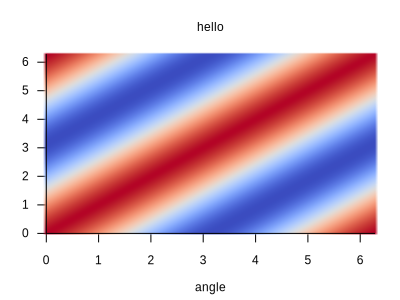

- : unit = ()


In [23]:
let _ =
  let display_id = Jupyter_notebook.display "text/html" "" in
  let open Gp in
  let figure phase (module P : Plot) =
    P.heatmap (`grid (make_data phase)) 
    (default_props @ [ xlabel "angle"; title "hello"])
  in
  let phases = Mat.linspace 0. Const.pi2 20 in
  Mat.iter
    (fun phase -> Juplot.draw ~display_id ~size:(400, 300) (figure phase))
    phases

In [26]:
(* convert -delay 20 test*.png -loop 0 movie.gif *)
let _ =
  let open Gp in
  let figure phase (module P : Plot) =
    P.heatmap
      (`grid (make_data phase))
      (default_props @ [ xlabel "angle"; title "hello" ])
  in
  let phases = Mat.linspace 0. Const.pi2 20 in
  Mat.iteri
    (fun i phase -> draw ~output:(png ~size:(400, 300) Printf.(sprintf "test%05i%s.png" i)) (figure phase))
    phases

- : unit = ()
